<h1><center>Customer Defection Prediction</center></h1>

>Customer defection is the loss of clients or customers.
Telephone service companies, ISPs, insurance firms, etc, often use customer defection analysis and
rates as one of their key business metrics because the cost of retaining an existing customer is far less
than acquiring a new one.


>My team of machine learning engineers were presented with data from a telco company and tasked to
analyse the data and gain insight into customer defection as-well-as develop a model that will predict
the possibility of defection by any customer. After successful completion of the project, we were
expected to prepare a report detailing our data analysis and information of algorithms used to develop
models for prediction.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

## Loading the Data

In [3]:
df = pd.read_csv('Copy of WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
x= df.columns
x, df.shape

(Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
        'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
       dtype='object'), (7043, 21))

In [5]:
df.describe()
df.info()
df.head()
df.isnull().sum()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Data Visualization
### Univariate and Bivariate Analysis

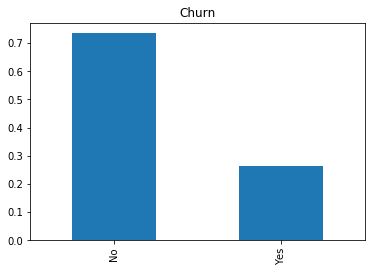

In [6]:
df['Churn'].value_counts(normalize=True).plot.bar(title='Churn')

**This shows that over 70% of the customers remained i.e. Did not Defect**

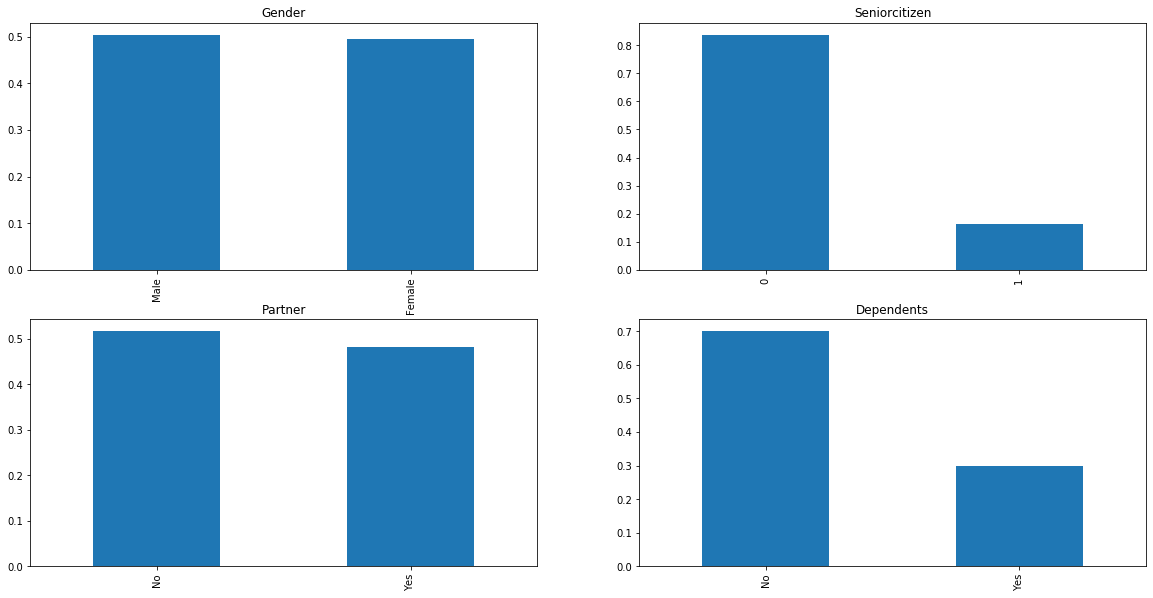

In [7]:
def plot():
    plt.subplot(221)
    df['gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title=x[1].title())
    plt.subplot(222)
    df[x[2]].value_counts(normalize=True).plot.bar(title=x[2].title())
    plt.subplot(223)
    df[x[3]].value_counts(normalize=True).plot.bar(title=x[3].title())
    plt.subplot(224)
    df[x[4]].value_counts(normalize=True).plot.bar(title=x[4].title())
plot()

## From the above plots, we can infer that:

- The distribution of Male and Female customers are almost equal. The same can be said about Having a Partner or Not.
- There are more younger customers than older ones.
- A lot of the customers have no dependents.

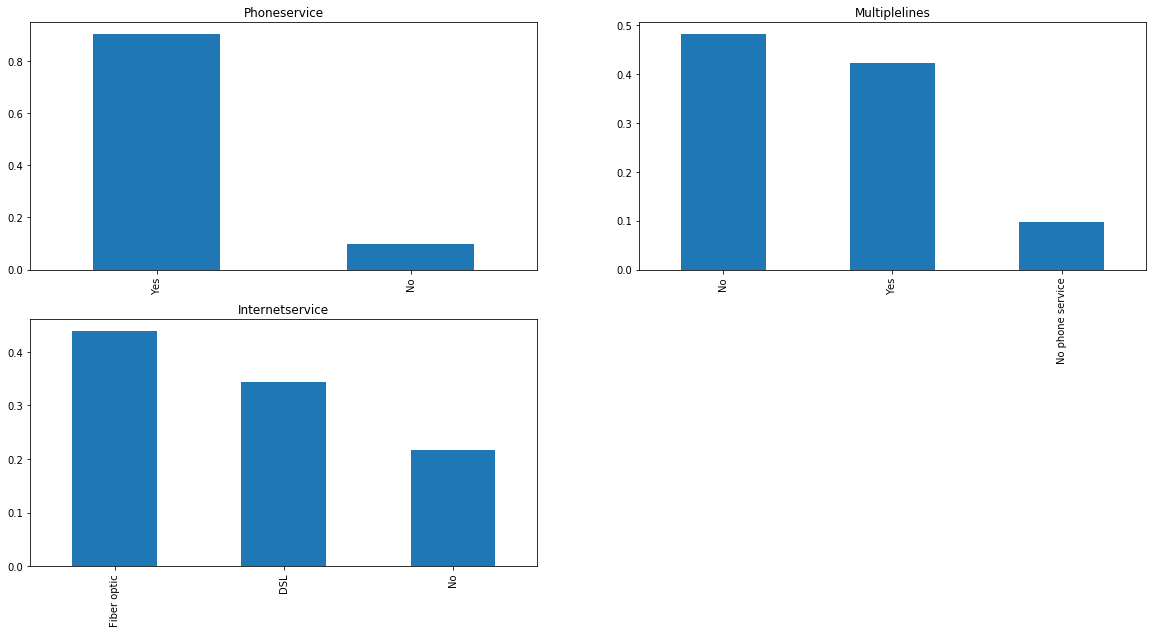

In [8]:
def plot():
    plt.subplot(221)
    df[x[6]].value_counts(normalize=True).plot.bar(figsize = (20,10),title=x[6].title())
    plt.subplot(222)
    df[x[7]].value_counts(normalize=True).plot.bar(title=x[7].title())
    plt.subplot(223)
    df[x[8]].value_counts(normalize=True).plot.bar(title=x[8].title())
plot()

## From these plots, we can see that:
- Most of the customers have phone service
- More customers use a Fibre optic internet connection and a Single line.

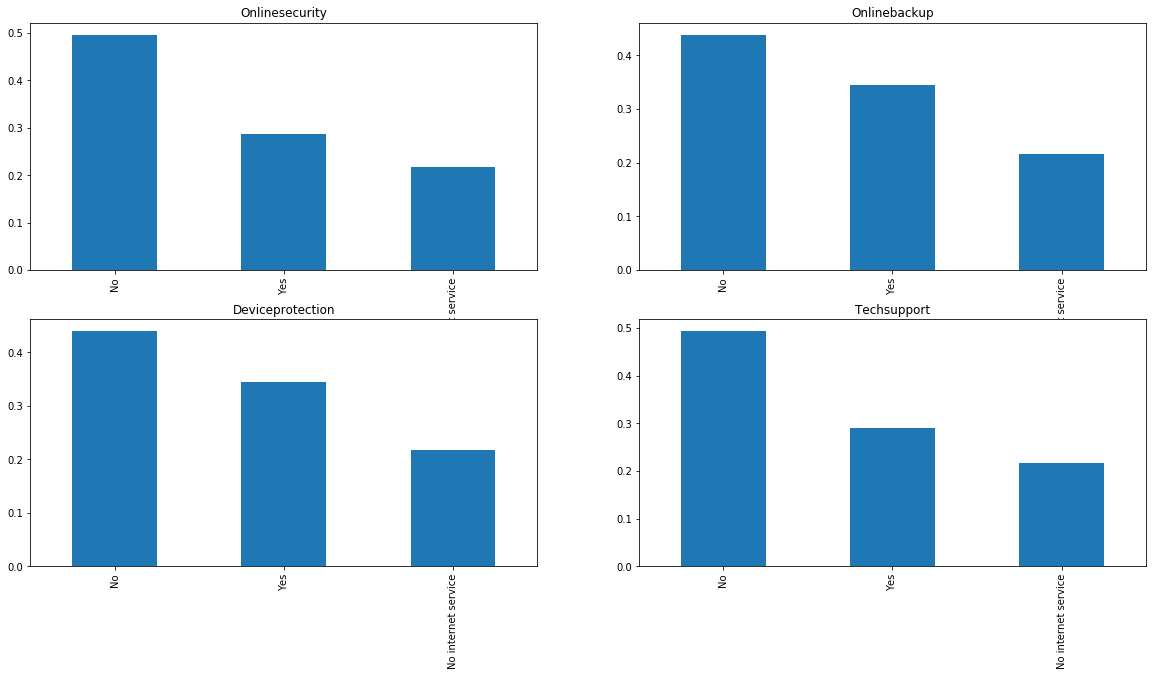

In [9]:
def plot():
    plt.figure(3)
    plt.subplot(221)
    df[x[9]].value_counts(normalize=True).plot.bar(figsize=(20,10),title=x[9].title())
    plt.subplot(222)
    df[x[10]].value_counts(normalize=True).plot.bar(title=x[10].title())
    plt.subplot(223)
    df[x[11]].value_counts(normalize=True).plot.bar(title=x[11].title())
    plt.subplot(224)
    df[x[12]].value_counts(normalize=True).plot.bar(title=x[12].title())
plot()

## By observing the above set of plots, we see that:
- The features: Online backup and Device Protection have the same distribution. The same can be said for Online Security and Tech support.
- More people lack add-ons that would make using the service better.

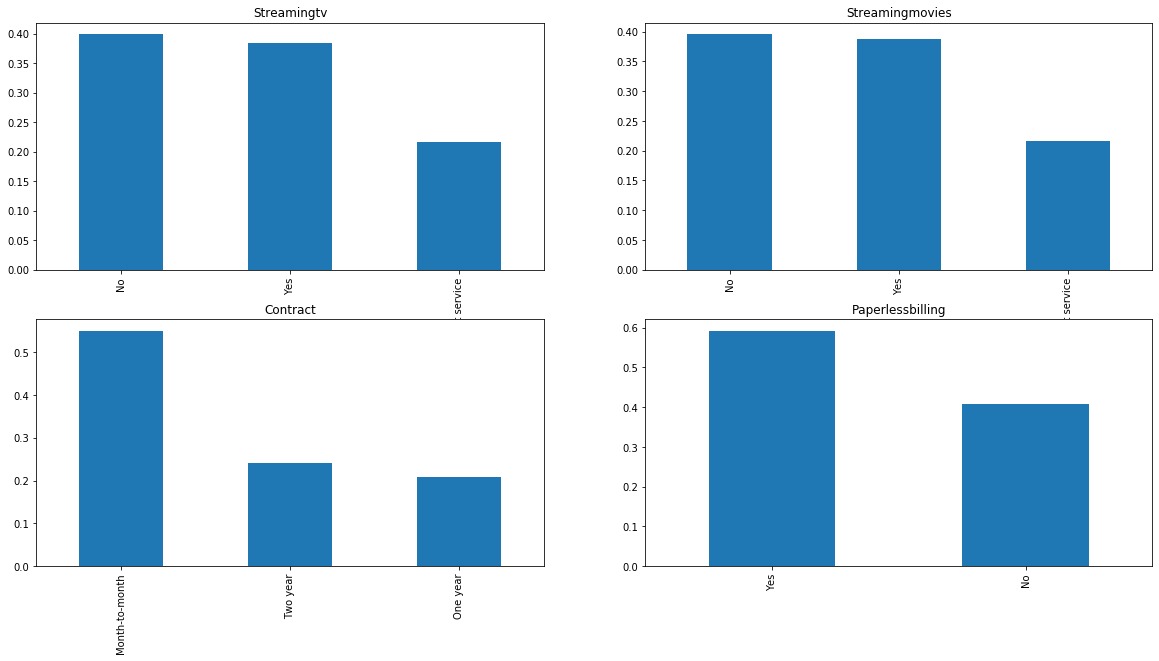

In [10]:
def plot():
    plt.figure(4)
    plt.subplot(221)
    df[x[13]].value_counts(normalize=True).plot.bar(figsize=(20,10),title=x[13].title())
    plt.subplot(222)
    df[x[14]].value_counts(normalize=True).plot.bar(title=x[14].title())
    plt.subplot(223)
    df[x[15]].value_counts(normalize=True).plot.bar(title=x[15].title())
    plt.subplot(224)
    df[x[16]].value_counts(normalize=True).plot.bar(title=x[16].title())
plot()

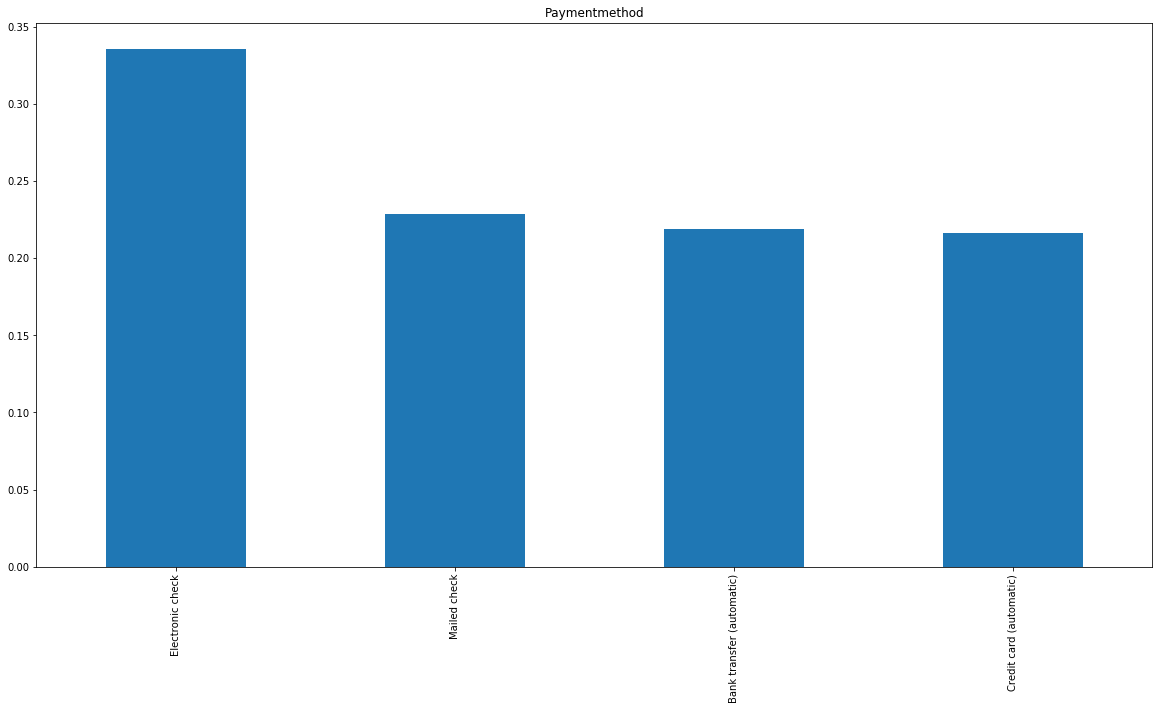

In [11]:
df[x[17]].value_counts(normalize=True).plot.bar(figsize=(20,10),title=x[17].title())

Text(0, 0.5, 'Number of Churned customers')

Text(0.5, 0, 'Tenures(months)')

<BarContainer object of 72 artists>

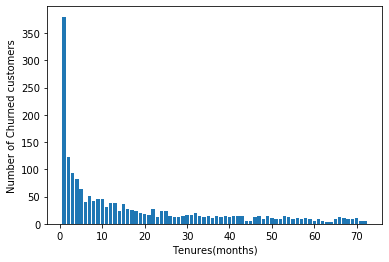

In [196]:
tenure=df.groupby('tenure')['Churn'].sum()
fig = plt.figure()
plt.ylabel('Number of Churned customers')
plt.xlabel('Tenures(months)')
plt.bar(x=tenure.keys(),height = tenure.values)
fig.savefig('tenure.png')

### This shows that most of the customers that churned were new.

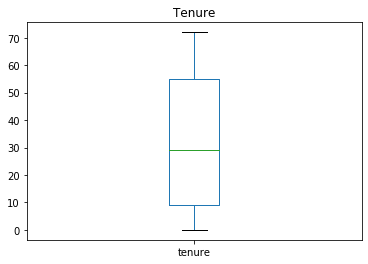

In [12]:
df[x[5]].plot.box(title=x[5].title())

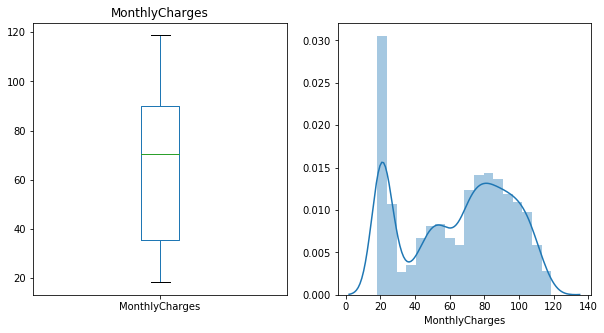

In [13]:
def plott():
    plt.subplot(121)

    df[x[18]].plot.box(title=x[18],figsize=(10,5))
    plt.subplot(122)
    sns.distplot(df[x[18]])
plott()

In [14]:
df= df.replace(' ',np.nan).dropna()
df[x[19]]= df[x[19]].astype('float64')

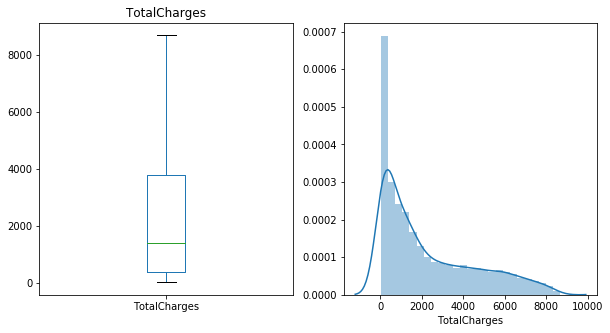

In [15]:
plt.subplot(121)
df[x[19]].plot.box(title=x[19],figsize=(10,5))
#plt.suptitle("")
plt.subplot(122)
sns.distplot(df[x[19]])

### From the above plots its is concluded that there are no numerical outliers in the dataset.

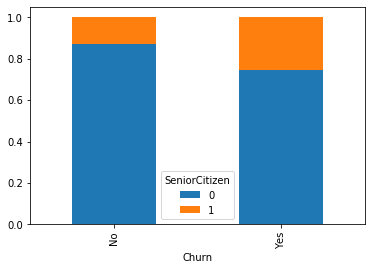

In [17]:
citizens1 = pd.crosstab(df['Churn'],df['SeniorCitizen'])
citizens1.div(citizens1.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

### From this stacked bar chat, we can see that a larger proportion of the defecting customers are not senior citizens.

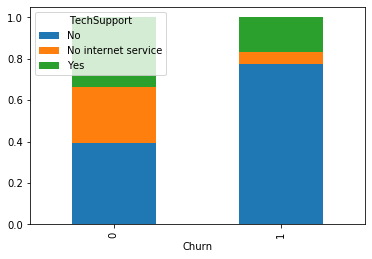

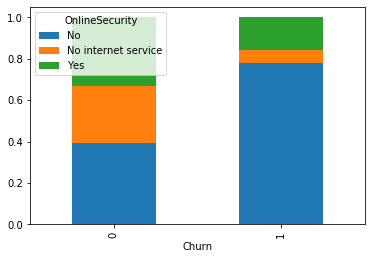

In [158]:
citizens = pd.crosstab(df['Churn'],df['TechSupport'])
citizens.div(citizens.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
citizens1 = pd.crosstab(df['Churn'],df['OnlineSecurity'])
citizens1.div(citizens.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

Similar to what was seen in the Univariate analysis, the distribution of customers that stay or leave is the same when we consider Tech support and Online security.

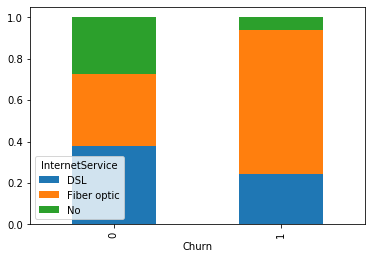

In [161]:
citizens1 = pd.crosstab(df['Churn'],df['InternetService'])
citizens1.div(citizens.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
#'MultipleLines', 'InternetService'

### Here it is seen that a large poportion of defected customers use Fibre optic Internet Service.

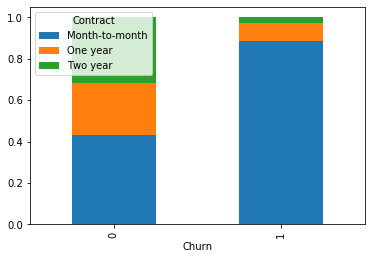

In [159]:
citizens1 = pd.crosstab(df['Churn'],df['Contract'])
citizens1.div(citizens.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

### It is seen that majority of the customers that churned were on a Month-to-month contract

In [20]:
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.017408,0.220737,0.107248,0.150541
tenure,0.017408,1.000000,0.275339,0.889177,-0.369659
MonthlyCharges,0.220737,0.275339,1.000000,0.638032,0.184167
TotalCharges,0.107248,0.889177,0.638032,1.000000,-0.232190
Churn,0.150541,-0.369659,0.184167,-0.232190,1.000000


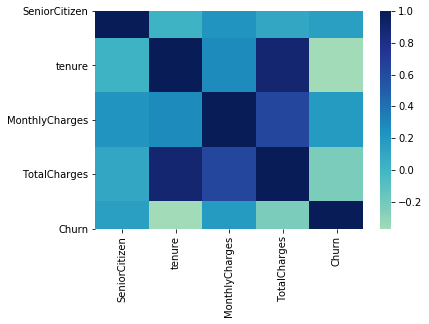

In [21]:
corr = df.corr(method='spearman')
corr
sns.heatmap(corr,cmap='YlGnBu',center=0)

### From the heatmap above, it is seen that the numerical features are not highly correlated with the target.

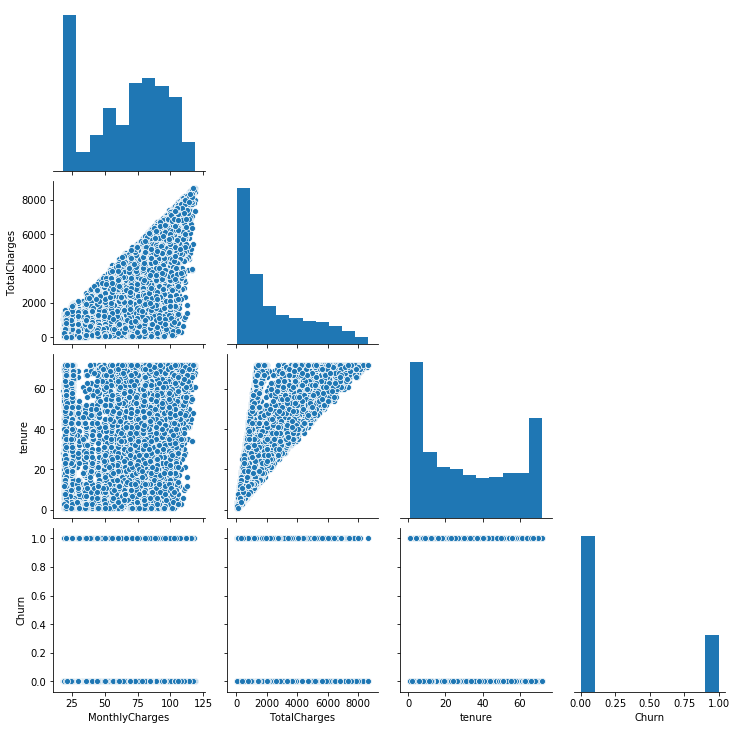

In [22]:
sns.pairplot(df,corner=True,vars=['MonthlyCharges','TotalCharges','tenure','Churn'])#,hue="Churn"

This is also seen in the pairplot above. None of the numerical features show any distinction between the different Classes.

In [23]:
feats = df.drop(['customerID','Churn'],axis=1)
target = df.Churn

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn',axis=1), df['Churn'],stratify=target, test_size = 0.2, random_state = 42)

In [25]:
for i in feats.columns:
    feats[i].unique()
feats.columns

array(['Female', 'Male'], dtype=object)

array([0, 1], dtype=int64)

array(['Yes', 'No'], dtype=object)

array(['No', 'Yes'], dtype=object)

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

array(['No', 'Yes'], dtype=object)

array(['No phone service', 'No', 'Yes'], dtype=object)

array(['DSL', 'Fiber optic', 'No'], dtype=object)

array(['No', 'Yes', 'No internet service'], dtype=object)

array(['Yes', 'No', 'No internet service'], dtype=object)

array(['No', 'Yes', 'No internet service'], dtype=object)

array(['No', 'Yes', 'No internet service'], dtype=object)

array(['No', 'Yes', 'No internet service'], dtype=object)

array(['No', 'Yes', 'No internet service'], dtype=object)

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

array(['Yes', 'No'], dtype=object)

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [26]:
enc = ['gender','Partner', 'Dependents','PaperlessBilling']
for i in enc:
    feats[i] = LabelEncoder().fit_transform(feats[i])

In [27]:
dum_train = pd.get_dummies(feats,columns =['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract','PaymentMethod'] )

In [28]:
dum_train = dum_train[[i for i in dum_train.columns if '_No internet service' not in i]]

In [29]:
def norm(data):
    data['MonthlyCharges'] = (data.MonthlyCharges - data.MonthlyCharges.max())/data.MonthlyCharges.std()
    data['TotalCharges'] = (data.TotalCharges - data.TotalCharges.max())/data.TotalCharges.std()

In [129]:
def tenure(data):
    data['short_tenure']=data['tenure'].apply(lambda x: 1 if x<24 else 0)
    data['mid_tenure'] = data['tenure'].apply(lambda x: 1 if 24<=x<48 else 0)
    data['long_tenure'] = data['tenure'].apply(lambda x: 1 if x>=48 else 0)
    data.drop('tenure',axis=1,inplace=True)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(dum_train, target, test_size = 0.2, stratify = target ,random_state = 42)

In [130]:
tenure(X_train)
tenure(X_test)

In [131]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,PaperlessBilling,MonthlyCharges,TotalCharges,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,short_tenure,mid_tenure,long_tenure
1413,1,0,1,1,0,94.55,6078.75,0,1,0,...,0,0,1,0,1,0,0,0,0,1
7003,1,0,0,0,0,35.75,1022.50,1,0,0,...,1,0,0,0,0,1,0,0,1,0
3355,0,0,1,0,0,90.20,6297.65,0,1,0,...,0,0,1,0,1,0,0,0,0,1
4494,1,0,0,0,0,84.30,235.05,0,1,1,...,1,0,0,0,0,1,0,1,0,0
3541,0,0,1,0,0,40.65,2070.75,1,0,0,...,1,0,0,1,0,0,0,0,0,1


# Model Training and Prediction

In [39]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,VotingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, precision_score

## The RandomForest Classifier

In [141]:
rf = RandomForestClassifier(n_estimators=300,max_features = 25,random_state=50)
rf.fit(X_train, y_train)
print(f"Training accuracy: {rf.score(X_train,y_train)}")
print(f"Test accuracy: {rf.score(X_test,y_test)}")
R = rf.predict(X_test)
roc_auc_score(y_test,R) , roc_auc_score( y_train,rf.predict(X_train))
f1_score(y_test,R) , f1_score( y_train,rf.predict(X_train))
precision_score(y_test,R) , precision_score( y_train,rf.predict(X_train))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=25,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

Training accuracy: 0.9987555555555555
Test accuracy: 0.7917555081734187


(0.7097804535877538, 0.9978722456614867)

(0.5772005772005773, 0.9976549413735343)

(0.6269592476489029, 0.9993288590604027)

## The GradientBoosting Classifier

In [140]:
gbdt = GradientBoostingClassifier(n_estimators = 85,random_state=50)
gbdt.fit(X_train,y_train)
print(f"Training accuracy: {gbdt.score(X_train,y_train)}")
print(f"Test accuracy: {gbdt.score(X_test,y_test)}")
G = gbdt.predict(X_test)
roc_auc_score(y_test,G) , roc_auc_score( y_train,gbdt.predict(X_train))
f1_score(y_test,G) , f1_score( y_train,gbdt.predict(X_train))
precision_score(y_test,G) , precision_score( y_train,gbdt.predict(X_train))

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=85,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=50, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Training accuracy: 0.8268444444444445
Test accuracy: 0.7981520966595593


(0.7132838262472111, 0.7474377869735276)

(0.5835777126099706, 0.6395262768319763)

(0.6461038961038961, 0.7158243579121789)

## The CatBoost Classifier


In [139]:
cbc = CatBoostClassifier(verbose = 0, learning_rate=0.10,n_estimators=50)
cbc.fit(X_train,y_train,plot=True)
print(f"Training accuracy: {cbc.score(X_train,y_train)}")
print(f"Test accuracy: {cbc.score(X_test,y_test)}")
Y = cbc.predict(X_test)
roc_auc_score(y_test,Y) , roc_auc_score( y_train,cbc.predict(X_train))
f1_score(y_test,Y) , f1_score( y_train,cbc.predict(X_train))
precision_score(y_test,Y) , precision_score( y_train,cbc.predict(X_train))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training accuracy: 0.8250666666666666
Test accuracy: 0.8009950248756219


(0.7194842911203028, 0.7423862430863167)

(0.5930232558139535, 0.632286995515695)

(0.6496815286624203, 0.7163420829805249)

In [147]:
importance = CatBoostClassifier.get_feature_importance(cbc, prettified=True)

In [189]:
importance.head(10)

,Feature Id,Importances
0,Contract_Month-to-month,12.803507
1,tenure,10.870720
2,TotalCharges,8.708167
3,MonthlyCharges,8.438733
4,Contract_Two year,6.273166
5,InternetService_Fiber optic,5.826433
6,PaymentMethod_Electronic check,4.555150
7,PaperlessBilling,3.890433
8,OnlineSecurity_No,3.880573
9,TechSupport_No,3.068292


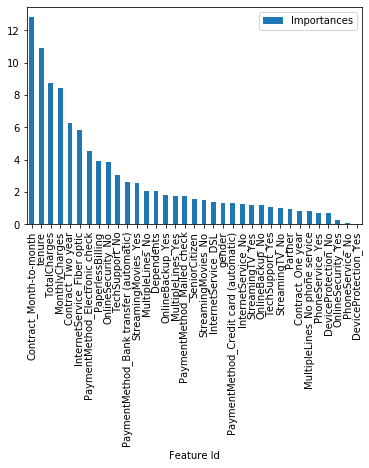

In [195]:
fig = importance.plot.bar(x='Feature Id',y = 'Importances')
